Taller #2
Integrantes: 
Luisa Fernanda Carpintero 
Majo Melo 
David Eduardo Lopez Jimenez

JUSTIFICACIÓN SELECCION DE BASE DE DATOS: 
Relevancia de la base de datos para su análisis:
El análisis del volumen de visas colombianas recibidas desde 2017 es crucial para comprender las dinámicas migratorias y los factores socioeconómicos que impulsan la movilidad de personas hacia Colombia. Esta información permite identificar patrones de migración asociados a cambios políticos, económicos y sociales tanto en los países de origen como en Colombia. Además, su estudio facilita la formulación de políticas migratorias más eficientes y adaptadas a las tendencias actuales.

Tipo de información contenida y su utilidad para el EDA:
La base de datos incluye variables clave como el año de solicitud, nacionalidad, sexo, fecha de nacimiento, vocación de permanencia y número de solicitudes. Estos datos son útiles para el Análisis Exploratorio de Datos (EDA) porque permiten detectar tendencias migratorias, analizar la distribución de nacionalidades, identificar diferencias en la vocación de permanencia y evaluar si existen variaciones significativas en función del género o la edad. A través de visualizaciones y estadísticas descriptivas, se pueden extraer insights valiosos sobre la migración a Colombia y su posible relación con eventos globales o políticas gubernamentales.

1. Variables disponibles y tipos de datos

In [36]:
import pandas as pd
import matplotlib.pyplot as plt


# Cargar el dataset (asegúrate de tener el archivo CSV disponible)
df = pd.read_csv("C:\\Users\\Asus-Laptop\\Downloads\\Volumen_de_solicitudes_de_visa_colombiana_recibidas_desde_2017_20250203.csv")

# Mostrar las primeras filas para ver la estructura
print(df.head())

# Identificar los tipos de datos
print(df.dtypes)
df.info(verbose=True)


   Año Solicitud         Nacionalidad      Sexo Fecha de Nacimiento  \
0           2017          ECUATORIANA  FEMENINO          24/07/1897   
1           2017  FEDERACION DE RUSIA  FEMENINO          03/05/1919   
2           2017             FRANCESA  FEMENINO          20/08/1919   
3           2017               CUBANA  FEMENINO          03/02/1922   
4           2017       ESTADOUNIDENSE  FEMENINO          17/11/1922   

       Vocación de permanencia  Número  
0  Con vocación de permanencia       2  
1  Sin vocación de permanencia       2  
2  Sin vocación de permanencia       1  
3  Sin vocación de permanencia       2  
4  Sin vocación de permanencia       1  
Año Solicitud               int64
Nacionalidad               object
Sexo                       object
Fecha de Nacimiento        object
Vocación de permanencia    object
Número                      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349583 entries, 0 to 349582
Data columns (total 6 columns):

Año Solicitud:
Descripción: Año en que se realizó la solicitud.
Tipo de dato: int64

Nacionalidad:
Descripción: Nacionalidad de la persona que realizó la solicitud.
Tipo de dato: object

Sexo:
Descripción: Sexo de la persona que realizó la solicitud.
Tipo de dato: object

Fecha de Nacimiento:
Descripción: Fecha de nacimiento de la persona que realizó la solicitud.
Tipo de dato: object

Vocación de permanencia:
Descripción: Indica si la persona tiene vocación de permanencia o no.
Tipo de dato: object

Número:
Descripción: Valor numérico asociado a la solicitud.
Tipo de dato: int64

2. Total de registros y representatividad de la muestra

In [7]:
print(f"Total de registros: {df.shape[0]}")
# Calcular los valores nulos por columna
missing_values = df.isnull().sum()

# Calcular el porcentaje de valores nulos por columna
missing_percentage = (missing_values / len(df)) * 100

# Crear un DataFrame con la información de los valores nulos
missing_df = pd.DataFrame({"Valores Nulos": missing_values, "Porcentaje (%)": missing_percentage})

# Mostrar el DataFrame con la información
print(missing_df)

# Calcular el porcentaje de valores no nulos por columna
no_nulos = (df.notnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

# Mostrar los porcentajes de valores no nulos
print(no_nulos)

Total de registros: 349583
                         Valores Nulos  Porcentaje (%)
Año Solicitud                        0        0.000000
Nacionalidad                         0        0.000000
Sexo                                 7        0.002002
Fecha de Nacimiento                  0        0.000000
Vocación de permanencia              0        0.000000
Número                               0        0.000000
Año Solicitud              100.000000
Nacionalidad               100.000000
Fecha de Nacimiento        100.000000
Vocación de permanencia    100.000000
Número                     100.000000
Sexo                        99.997998
dtype: float64


Tecnologías a utilizadar:
Python: Lenguaje de programación principal.
pandas: Para manipulación y limpieza de datos.
numpy: Para operaciones matemáticas y estadísticas.
matplotlib: Para visualización de datos.

Resumen estadístico inicial

In [4]:
print(df.describe(include="all"))  # Incluye estadísticas de variables numéricas y categóricas


        Año Solicitud Nacionalidad       Sexo Fecha de Nacimiento  \
count   349583.000000       349583     349576              349583   
unique            NaN          199          2               31083   
top               NaN   VENEZOLANA  MASCULINO          01/01/1990   
freq              NaN        69094     224294                  57   
mean      2019.270342          NaN        NaN                 NaN   
std          1.825129          NaN        NaN                 NaN   
min       2017.000000          NaN        NaN                 NaN   
25%       2018.000000          NaN        NaN                 NaN   
50%       2019.000000          NaN        NaN                 NaN   
75%       2021.000000          NaN        NaN                 NaN   
max       2024.000000          NaN        NaN                 NaN   

            Vocación de permanencia         Número  
count                        349583  349583.000000  
unique                            2            NaN  
top     Con 

C:\Users\Luisa Carpintero\AppData\Local\Temp\ipykernel_24692\2344190209.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Fecha de Nacimiento"] = pd.to_datetime(df["Fecha de Nacimiento"], errors="coerce")


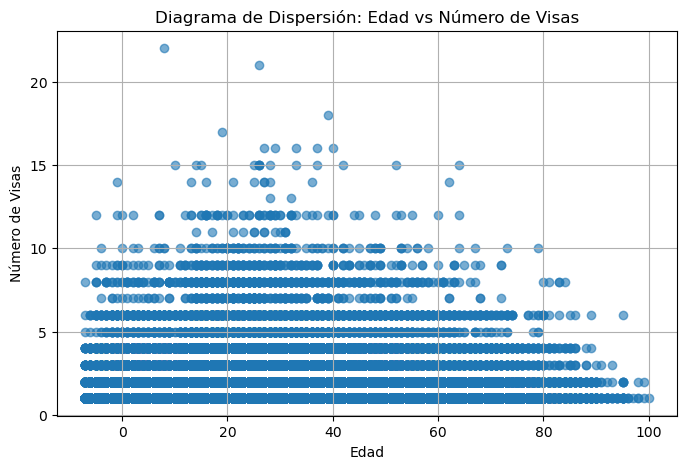

In [5]:
# Cargar los datos
df["Fecha de Nacimiento"] = pd.to_datetime(df["Fecha de Nacimiento"], errors="coerce")

# Filtrar fechas de nacimiento inválidas 
df = df[df["Fecha de Nacimiento"].dt.year >= 1917]  # Solo personas nacidas después de 1917

# Calcular la edad correctamente
df["Edad"] = 2017 - df["Fecha de Nacimiento"].dt.year

# Crear diagrama de dispersión entre edad y número de visas otorgadas
plt.figure(figsize=(8, 5))
plt.scatter(df["Edad"], df["Número"], alpha=0.6)
plt.xlabel("Edad")
plt.ylabel("Número de Visas")
plt.title("Diagrama de Dispersión: Edad vs Número de Visas")
plt.grid(True)
plt.show()

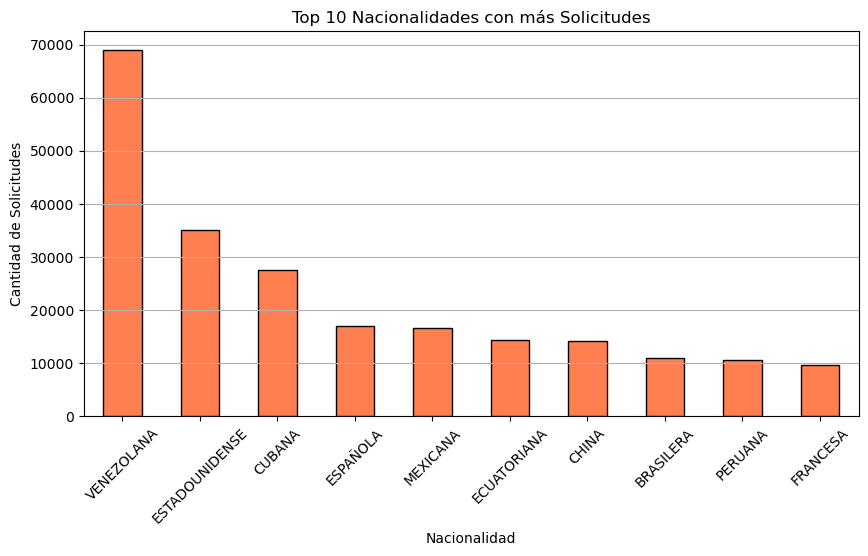

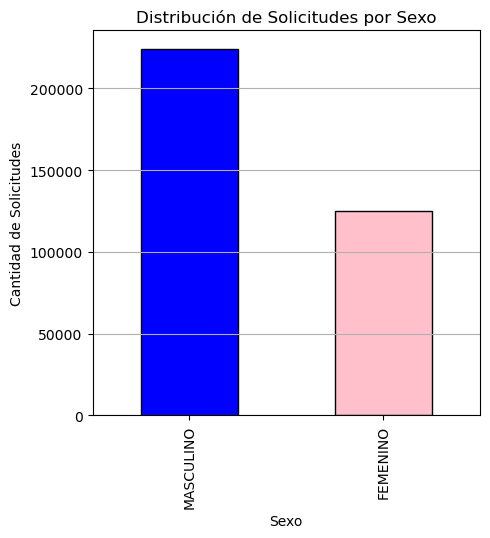

In [6]:
# Top 10 Nacionalidades con más solicitudes
plt.figure(figsize=(10,5))
df["Nacionalidad"].value_counts().nlargest(10).plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel("Nacionalidad")
plt.ylabel("Cantidad de Solicitudes")
plt.title("Top 10 Nacionalidades con más Solicitudes")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Distribución de solicitudes por sexo
plt.figure(figsize=(5,5))
df["Sexo"].value_counts().plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
plt.xlabel("Sexo")
plt.ylabel("Cantidad de Solicitudes")
plt.title("Distribución de Solicitudes por Sexo")
plt.grid(axis="y")
plt.show()


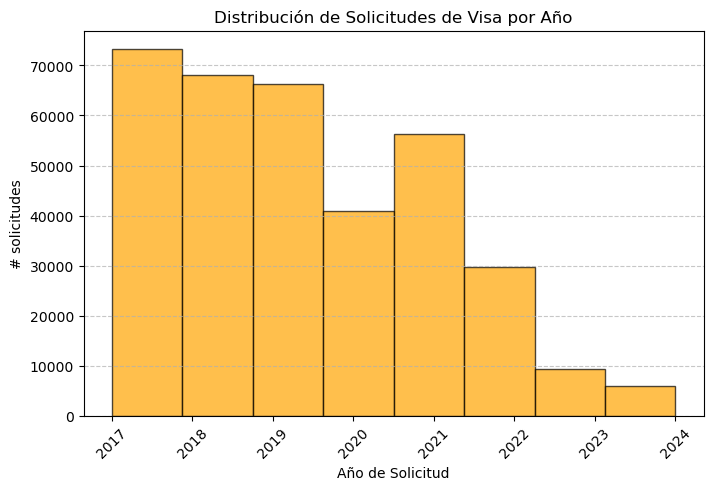

In [9]:
plt.figure(figsize=(8, 5))
plt.hist(df["Año Solicitud"], bins=len(df["Año Solicitud"].unique()), color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Año de Solicitud")
plt.ylabel("# solicitudes")
plt.title("Distribución de Solicitudes de Visa por Año")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

3. Tratamiento de Missing y Outliers
Primero vamos a identificar los valores faltantes por columna y su proporción


In [15]:
# Identificar valores faltantes
missing_data = df.isnull().sum()

# Calcular la proporción de valores faltantes
missing_data_percentage = (missing_data / len(df)) * 100

# Mostrar los resultados
print("Valores faltantes por columna:\n", missing_data)
print("\nProporción de valores faltantes (%):\n", missing_data_percentage)


Valores faltantes por columna:
 Año Solicitud              0
Nacionalidad               0
Sexo                       0
Fecha de Nacimiento        0
Vocación de permanencia    0
Número                     0
Edad                       0
dtype: int64

Proporción de valores faltantes (%):
 Año Solicitud              0.0
Nacionalidad               0.0
Sexo                       0.0
Fecha de Nacimiento        0.0
Vocación de permanencia    0.0
Número                     0.0
Edad                       0.0
dtype: float64


Ahora que ya sabemos que la única columna con valores faltantes es la columna "sexo", decidimos como tratar estos valores faltantes. ya que solo faltan 7 valores, entonces vamos a imputarlos utilizando la moda, ya que la variable "Sexo" es categorica.

In [14]:
# Imputar los valores faltantes en "Sexo" con la moda
df['Sexo'] = df['Sexo'].fillna(df['Sexo'].mode()[0])

# Verificar que no haya valores faltantes en la columna "Sexo"
print(df['Sexo'].isnull().sum())




0


Ahora que ya se soluciono lo de los valores faltantes, vamos a hacer un tratamiento sobre los valores atipicos. Este tratamiento se hará unicamente en las columnas de edad y Número, debido a que son las unicas columnas numericas.

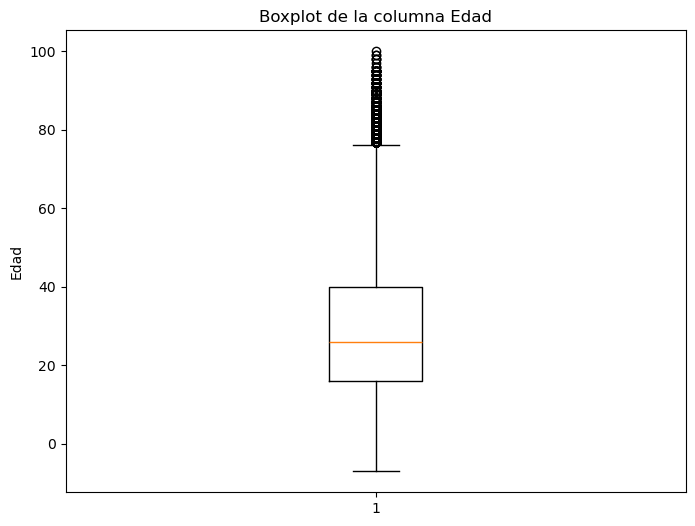

        Año Solicitud         Nacionalidad       Sexo Fecha de Nacimiento  \
1                2017  FEDERACION DE RUSIA   FEMENINO          1919-05-03   
2                2017             FRANCESA   FEMENINO          1919-08-20   
3                2017               CUBANA   FEMENINO          1922-02-03   
4                2017       ESTADOUNIDENSE   FEMENINO          1922-11-17   
5                2017               CUBANA   FEMENINO          1924-10-06   
...               ...                  ...        ...                 ...   
343716           2024          ECUATORIANA   FEMENINO          1930-06-30   
345674           2024       ESTADOUNIDENSE  MASCULINO          1928-08-31   
345675           2024          ECUATORIANA  MASCULINO          1929-07-15   
345676           2024           VENEZOLANA  MASCULINO          1930-01-06   
345677           2024       ESTADOUNIDENSE  MASCULINO          1930-08-07   

            Vocación de permanencia  Número  Edad  z_score_numero   z_score

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Crear un boxplot para la columna "Edad" (puedes usar otra columna numérica)
plt.figure(figsize=(8, 6))
plt.boxplot(df['Edad'])
plt.title('Boxplot de la columna Edad')
plt.ylabel('Edad')
plt.show()

# Calcular el Z-score para la columna "Edad"
df['z_score'] = zscore(df['Edad'])

# Filtrar los valores atípicos (Z-score > 3 o Z-score < -3)
outliers = df[df['z_score'].abs() > 3]

# Mostrar los valores atípicos
print(outliers)


Despues de observar los valores atipicos de la columan edad del dataset, consideramos que no es necesario eliminar los datos atipicos, por lo tanto se transformarán a la mediana.

In [24]:
df['Edad'] = np.where(df['z_score'].abs() > 3, df['Edad'].median(), df['Edad'])


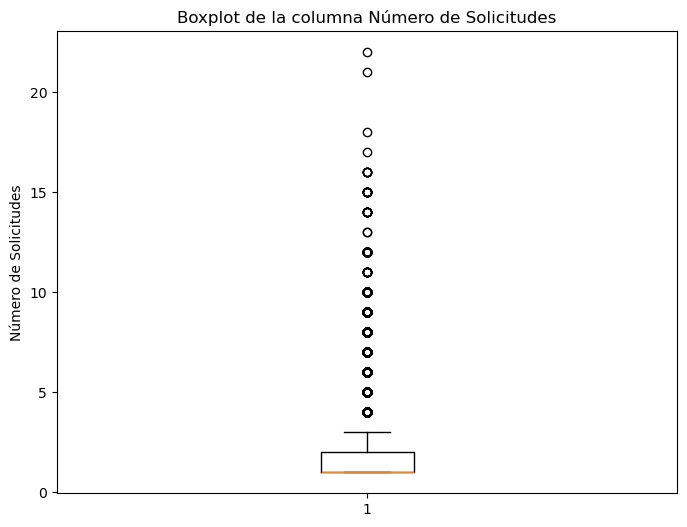

        Año Solicitud    Nacionalidad       Sexo Fecha de Nacimiento  \
161              2017      VENEZOLANA   FEMENINO          1937-06-11   
585              2017      VENEZOLANA   FEMENINO          1944-10-20   
1092             2017        MARROQUI   FEMENINO          1949-10-17   
1103             2017        ITALIANA   FEMENINO          1949-11-02   
1536             2017      VENEZOLANA   FEMENINO          1952-09-08   
...               ...             ...        ...                 ...   
349055           2024        ITALIANA  MASCULINO          2010-09-26   
349109           2024           CHINA  MASCULINO          2012-02-25   
349341           2024        ESPAÑOLA  MASCULINO          2017-04-30   
349493           2024  ESTADOUNIDENSE  MASCULINO          2021-07-13   
349569           2024     ECUATORIANA  MASCULINO          2023-09-29   

            Vocación de permanencia  Número  Edad  z_score_numero  
161     Sin vocación de permanencia       6    80        4.353879  

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Crear un boxplot para la columna "Número"
plt.figure(figsize=(8, 6))
plt.boxplot(df['Número'])
plt.title('Boxplot de la columna Número de Solicitudes')
plt.ylabel('Número de Solicitudes')
plt.show()

# Calcular el Z-score para la columna "Número"
df['z_score_numero'] = zscore(df['Número'])

# Filtrar los valores atípicos (Z-score > 3 o Z-score < -3)
outliers_numero = df[df['z_score_numero'].abs() > 3]

# Mostrar los valores atípicos de la columna "Número"
print(outliers_numero)


Despues de analisar los datos atipicos de la columan numero de solicitudes, se ha decidido mantener los datos y modificarlos por la mediana. Aunque representen unicamente el 1.67% del dataset, no consideramos que los datos tengan algún error de registro.

In [22]:
# Reemplazar los outliers por la mediana
df['Número'] = np.where(df['z_score_numero'].abs() > 3, df['Número'].median(), df['Número'])

4. Aplicación de pruebas de hipotesis

Hipótesis Nula (H0): No hay diferencia significativa en el volumen de solicitudes de visa entre solicitantes de nacionalidades de Venezuela y otras regiones.
Hipótesis Alternativa (H1): Hay una diferencia significativa en el volumen de solicitudes de visa entre solicitantes de nacionalidades de Venezuela.

Prueba Estadística 

Para comparar los volúmenes de solicitudes de visa entre solicitantes de nacionalidades de Venezuela y otras regiones, utilizaremos la prueba t de Student. La prueba t de Student es adecuada cuando queremos comparar las medias de dos grupos independientes. En este caso, los dos grupos son solicitantes de nacionalidad venezolana y solicitantes de otras regiones.

Antes de aplicar la prueba t, es importante verificar si ambos grupos tienen varianzas iguales o diferentes, ya que esto determina qué versión de la prueba debemos usar. Para esto, realizamos la prueba de Levene, que evalúa si las varianzas de los dos grupos son estadísticamente iguales.


In [59]:
import pandas as pd
from scipy import stats

# Separar los datos en dos grupos: Venezuela y otras regiones
venezuela_data = df[df['Nacionalidad'] == 'VENEZOLANA']['Número']
otras_regiones_data = df[df['Nacionalidad'] != 'VENEZOLANA']['Número']

# Prueba de Levene para igualdad de varianzas
stat_levene, p_levene = stats.levene(venezuela_data, otras_regiones_data)

# Resultado
print(f"Levene Statistic: {stat_levene:.4f}")
print(f"P-value: {p_levene:.4f}")

# Interpretación
alpha = 0.05
if p_levene > alpha:
    print("Las varianzas son iguales (se puede usar t-Student con Varianza iguales).")
else:
    print("Las varianzas son diferentes (se debe usar t-Student con Varianza diferentes).")


Levene Statistic: 1935.2677
P-value: 0.0000
Las varianzas son diferentes (se debe usar t-Student con Varianza diferentes).


Nivel de Significancia
El nivel de significancia seleccionado es 0.05, lo que corresponde a un nivel de confianza del 95%. 

In [58]:
import pandas as pd
from scipy import stats

# Separar los datos en dos grupos: Venezuela y otras regiones
venezuela_data = df[df['Nacionalidad'] == 'VENEZOLANA']['Número']
otras_regiones_data = df[df['Nacionalidad'] != 'VENEZOLANA']['Número']

# Realizar la prueba t de Student con varianzas Diferentes
t_stat, p_value = stats.ttest_ind(venezuela_data, otras_regiones_data, equal_var=False)

# Resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretación 
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0). Hay una diferencia significativa en el volumen de solicitudes de visa entre solicitantes de nacionalidades de Venezuela y otras regiones.")
else:
    print("No rechazamos la hipótesis nula (H0). No hay una diferencia significativa en el volumen de solicitudes de visa entre solicitantes de nacionalidades de Venezuela y otras regiones.")

T-statistic: 38.901496189590155
P-value: 0.0
Rechazamos la hipótesis nula (H0). Hay una diferencia significativa en el volumen de solicitudes de visa entre solicitantes de nacionalidades de Venezuela y otras regiones.


Debido a los resultados de la prueba de hipotesis, se decidio presentar las siguiente evidencia para comprobar que la prueba t de Student con varianzas diferentes fue realizada correctamente

La prueba t asume que los datos son aproximadamente normales. Para comprobarlo, vamos a visualizar un histograma:

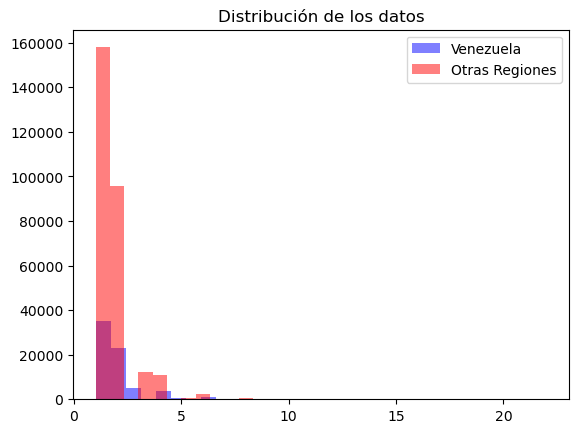

In [63]:
import matplotlib.pyplot as plt

# Histograma para Venezuela
plt.hist(venezuela_data, bins=30, alpha=0.5, label="Venezuela", color="blue")
# Histograma para Otras Regiones
plt.hist(otras_regiones_data, bins=30, alpha=0.5, label="Otras Regiones", color="red")
plt.legend()
plt.title("Distribución de los datos")
plt.show()




para comprobar la normalidad de las muestras el histograma formo una campana. Esta forma se conoce como "campana de Gauss" y prueba su normalidad 

Se comprobo que la prueba fue realizada Correctamente debido a que: 
-Se utilizó la prueba t con varianzas diferentes (equal_var=False).
-La prueba de Levene confirmó que las varianzas eran distintas.
-Se comprobó la normalidad de los datos.

INTERPRETACIÓN FINAL DE LA PRUEBA

-Rechazo de H0: Dado que el p-value es menor que 0.05, rechazamos la hipótesis nula.
-Aceptación de H1: Hay una diferencia significativa en el volumen de solicitudes de visa entre solicitantes de nacionalidades de Venezuela y otras regiones.

Conclusiones:
existe una diferencia significativa en el volumen de solicitudes de visa entre los solicitantes de nacionalidad venezolana y los de otras regiones. Esto sugiere que la nacionalidad venezolana tiene un impacto notable en el volumen de solicitudes de visa colombiana durante el período de 2017 a 2025.

El notable impacto de la nacionalidad venezolana en el volumen de solicitudes de visa colombiana durante el período de 2017 a 2025 puede atribuirse a varios factores:

1.Crisis Económica y Política en Venezuela:

La situación económica y política en Venezuela ha sido extremadamente inestable durante estos años, lo que ha llevado a una crisis humanitaria significativa. La hiperinflación, la escasez de alimentos y medicinas, y la inseguridad han impulsado a muchos venezolanos a buscar mejores oportunidades en otros países, incluyendo Colombia

2.Migración Masiva:

La migración masiva de venezolanos hacia Colombia ha sido una de las más grandes en la región. Colombia ha sido uno de los principales destinos debido a su proximidad geográfica y la facilidad relativa de cruzar la frontera

3.Proximidad Geográfica y Relaciones Bilaterales: La proximidad geográfica entre Colombia y Venezuela, junto con la reapertura de fronteras y la mejora de las relaciones diplomáticas, ha facilitado el flujo de personas entre ambos países, incrementando así el volumen de solicitudes de visa.

